# 1. Perkenalan

#### Nama: Muhamad Afif Thufail
#### Batch: FTDS 10
#### Dataset : Bank-Additional-Full

# 2. Import Libraries

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import asarray
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder
from feature_engine.outliers import Winsorizer
from feature_engine.outliers import OutlierTrimmer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 3. Data Loading

In [338]:
data = pd.read_csv('bank-additional-full.csv', sep=';')

In [339]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [340]:
data.shape

(41188, 21)

Terdapat 41188 baris dan 21 kolom

In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Terdapat 21 data dengan type data float sebanyak 5 data, type data integer sebanyak 5 data, dan type data objecr sebesar 11 data.

In [342]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Tidak ada Missing Value di dalam dataset

In [343]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Terdapat keanehan dimana pdays memiliki nilai Q1,Q2,Q3, dan Max yang sama. Menurut sumber data ini diambil, nilai 999 merupakan missing values sehingga harus diubah menjadi NAN di data preprocessing

In [344]:
data_copy = data.copy()

Data di copy agar memiliki backup jika terdapat sesuatu yang tidak diinginkan

# 4. Exploratory Data Analysis

## Attribute Information

##### 1. age (numeric)
##### 2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
##### 3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
##### 4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
##### 5. default: has credit in default? (categorical: 'no','yes','unknown')
##### 6. housing: has housing loan? (categorical: 'no','yes','unknown')
##### 7. loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
##### 8. contact: contact communication type (categorical: 'cellular','telephone')
##### 9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
##### 10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
##### 11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
##### 12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
##### 13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
##### 14. previous: number of contacts performed before this campaign and for this client (numeric)
##### 15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes
##### 16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
##### 17. cons.price.idx: consumer price index - monthly indicator (numeric)
##### 18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
##### 19. euribor3m: euribor 3 month rate - daily indicator (numeric)
##### 20. nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
##### 21. y - has the client subscribed a term deposit? (binary: 'yes','no')

Term Deposit atau Deposito berjangka merupakan produk simpanan yang bisa ditarik dalam jangka waktu tertentu, bisa 1 bulan, 6 bulan, 12 bulan, atau lebih dari waktu tersebut. Para nasabah akan mendapat bunga per tenor, sesuai yang ditawarkan oleh pihak bank.

###### Sumber: https://www.kreditpintar.com/education/deposito-berjangka

In [345]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [346]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Sebanyak 36548 client yang belum menjadi nasabah deposito berjangka dan sebanyak 4640 merupakan nasabah yang sudah menjadi pelanggan deposito berjangka

### Age

In [347]:
age = data['age'].value_counts()
age

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

<AxesSubplot:>

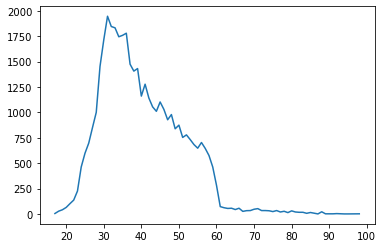

In [348]:
sns.lineplot(x=age.keys(), y=age.values, data=age) 

Secara keseluruhan client pada data tersebut kebanyakan berumur 30 - 40 tahun

In [349]:
yes_age = data[data ['y'] =='yes']['age'].value_counts()
yes_age

31    220
33    210
30    202
29    186
34    184
     ... 
92      3
17      2
98      2
89      2
87      1
Name: age, Length: 75, dtype: int64

<AxesSubplot:>

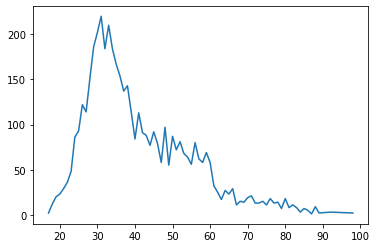

In [350]:

sns.lineplot(x=yes_age.keys(), y=yes_age.values, data=yes_age) 

Umur client memiliki deposito berjangka didominasi oleh client pada rentang umur 30 - 40 tahun.

### Job

In [351]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Kebanyakan client bekerja sebagai admin diikuti oleh blue-collar dan technician

In [352]:
yes_job = data[data ['y'] =='yes']['job'].value_counts()
df_yes_job = pd.DataFrame(yes_job)
df_yes_job 

,job
admin.,1352
technician,730
blue-collar,638
retired,434
management,328
services,323
student,275
self-employed,149
unemployed,144
entrepreneur,124


<AxesSubplot:>

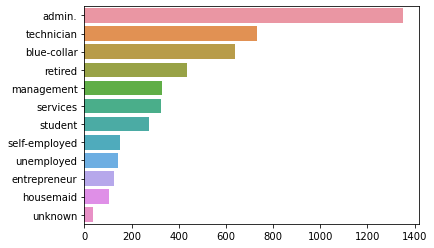

In [353]:
sns.barplot(x=yes_job.values, y=yes_job.keys(), data=df_yes_job) 

Jenis perkerjaan client dengan deposito berjangka kebanyakan adalah seorang Admin, Teknisi, dan pekerjaan blue-collar. Alasan mengapa client yang bekerja sebagai Admin banyak menggunakan deposit berjangka tidak diketahui.

Blue collar merupakan istilah yang merujuk kepada pekerja yang lebih sering menggunakan kekuatan fisik dan tenaga untuk mengerjakan aneka pekerjaan manual. Mereka dapat memiliki kecakapan khusus atau bahkan tidak memilikinya sama sekali. Contoh kemampuan yang dimiliki seperti keterampilan menggunakan alat atau mengoperasikan mesin tertentu. Para pekerja kerah biru ini sering bekerja di bidang bisnis yang beroperasi di lapangan maupun pabrik. Contohnya adalah agribisnis, manufaktur, konstruksi, pertambangan, hingga aneka jenis maintenance.

###### Sumber: https://sampingan.co.id/post/apa-itu-blue-collar-worker

Pekerjaan nantinya akan dibagi menjadi beberapa kelompok seperti Blue-colar, White-Collar, Not Working, dan Unknown

### Marital

In [354]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [355]:
yes_marital = data[data ['y'] =='yes']['marital'].value_counts()
yes_marital

married     2532
single      1620
divorced     476
unknown       12
Name: marital, dtype: int64

<AxesSubplot:ylabel='marital'>

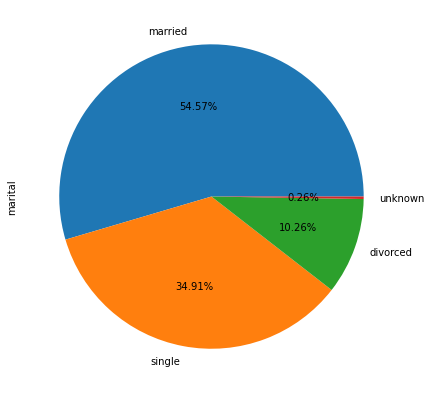

In [356]:
yes_marital.plot(kind='pie', figsize=(7,7), autopct='%.2f%%')

Sebanyak 55% client yang memiliki deposito berjangka berstatus menikah, 35% berstatus single, dan 10% berstatus cerai.

### Education

In [357]:
edu = data['education'].value_counts()
edu

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [358]:
yes_edu = data[data ['y'] =='yes']['education'].value_counts()
yes_edu

university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: education, dtype: int64

<AxesSubplot:xlabel='education'>

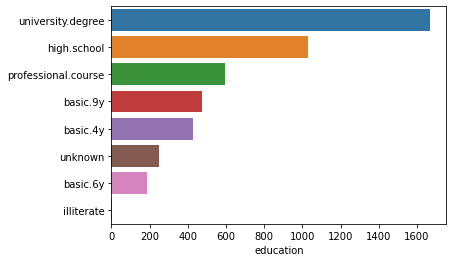

In [359]:
sns.barplot( x=yes_edu, y=yes_edu.index, orient='h') 

Client dengan gelar universitas merupakan client yang yang memiliki deposito berjangka terbanyak disusul dengan client yang lulusan SMA dan Kursus Profesional. Tetapi, bisa saja client yang berpendidikan SMA sedang menjalani proses perkuliahan sehingga belum memiliki gelar Universitas.

Sebanyak 55% pekerjaan admin dilakukan oleh seorang yang memiliki gelar sarjana Universitas, sementara 32% adalah mereka yang berpendidikan SMA

### Default

In [360]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

Maksud credit in default yaitu ketika sang peminjam utang gagal membayar utang sesuai kesepakatan yang telah dibuat. 

###### Sumber: https://www.valuepenguin.com/loans/what-does-it-mean-to-default-on-a-loan#:~:text=Loan%20Default%20Explained,course%20of%20weeks%20or%20months.

Dari data tersebut hanya 3 client saya yang pernah mengalami gagal membayar utang dan kebanyakan tidak pernah mengalaminya.

In [361]:
data[data ['default'] =='yes']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


### Housing

In [362]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [363]:
yes_housing = data[data ['y'] =='yes']['housing'].value_counts()
yes_housing

yes        2507
no         2026
unknown     107
Name: housing, dtype: int64

<AxesSubplot:ylabel='housing'>

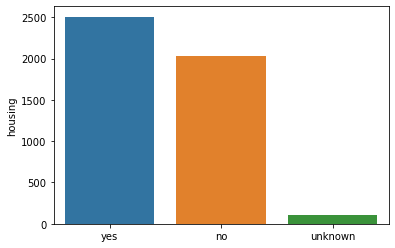

In [364]:
sns.barplot( x=yes_housing.index, y=yes_housing, orient='v') 

Client yang merupakan nasabah deposito berjangka kebanyakan memiliki utang rumah, tetapi nilainya tidak terlalu signifikan dengan yang tidak memiliki utang rumah.

### Loan

In [365]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [366]:
yes_loan = data[data ['y'] =='yes']['loan'].value_counts()
yes_loan

no         3850
yes         683
unknown     107
Name: loan, dtype: int64

<AxesSubplot:xlabel='loan'>

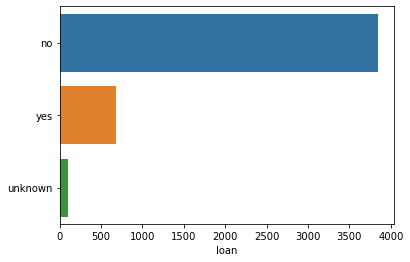

In [367]:
sns.barplot( x=yes_loan, y=yes_loan.index, orient='h') 

Kebanyakan client tidak memiliki pinjaman dan kebanyakan nasabah yang memiliki deposito berjangka tidak memiliki pinjaman.

### Contact

In [368]:
contact = data['contact'].value_counts()
contact

cellular     26144
telephone    15044
Name: contact, dtype: int64

<AxesSubplot:ylabel='contact'>

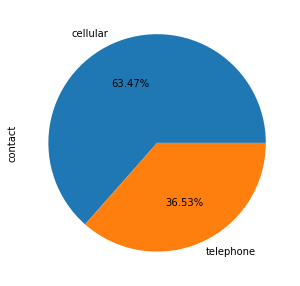

In [369]:
contact.plot(kind='pie', figsize=(5,5), autopct='%.2f%%')

In [370]:
yes_contact = data[data ['y'] =='yes']['contact'].value_counts()
yes_contact

cellular     3853
telephone     787
Name: contact, dtype: int64

<AxesSubplot:ylabel='contact'>

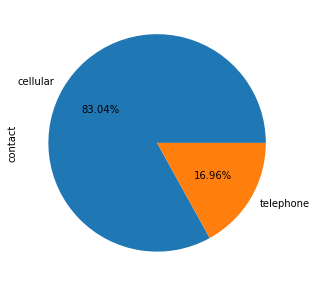

In [371]:
yes_contact.plot(kind='pie', figsize=(5,5), autopct='%.2f%%')

Sebanyak 63% client dihubungi dengan cellular dan sebanyak 83% Client yang memiliki deposito berjangka dihubungi melalui cellular

### Month

In [372]:
data['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [373]:
yes_month = data[data ['y'] =='yes']['month'].value_counts()
yes_month

may    886
aug    655
jul    649
jun    559
apr    539
nov    416
oct    315
mar    276
sep    256
dec     89
Name: month, dtype: int64

<AxesSubplot:xlabel='month'>

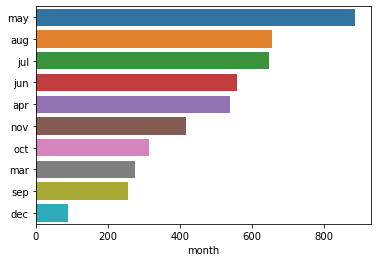

In [374]:
sns.barplot( x=yes_month, y=yes_month.index, orient='h') 

Kebanyakan client terakhir dihubungi pada bulan Mei begitu pula dengan client yang memiliki deposito berjangka

### Day of Week

In [375]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [376]:
yes_day = data[data ['y'] =='yes']['day_of_week'].value_counts()
yes_day

thu    1045
tue     953
wed     949
mon     847
fri     846
Name: day_of_week, dtype: int64

Hari dimana para client dihubungin merupakan hari kerja dan kurang lebih jumlahnya sama pada setiap harinya hanya saja pada hari jumat, client yang dihubungi tidak sebanyak hari lainnya.

### Duration

Text(0.5, 1.0, 'Histogram of Duration')

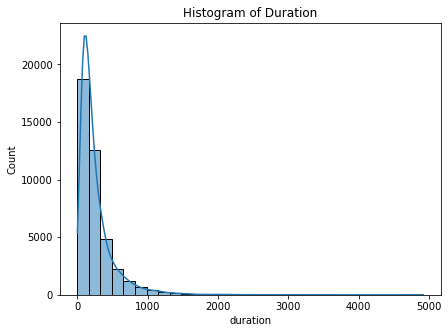

In [377]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['duration'], bins=30, kde=True)
plt.title('Histogram of Duration')

In [378]:
print(data['duration'].max())
print(data['duration'].mode()[0])
print(data['duration'].mean())

4918
85
258.2850101971448


In [379]:
data[data ['duration'] ==0]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


Kebanyakan client memiliki durasi pembicaraan pada sekitar 0 - 500 detik. Dimana durasi terlama berada pada angka 4918 detik dan dengan durasi terbanyak sebesar 85 detik. Sebanyak 4 client yang tidak diangkat pada saat ditelpon dan rata-rata durasi telepon sebesar 258 detik

In [380]:
yes_duration = data[data ['y'] =='yes']['duration']
yes_duration

75       1575
83       1042
88       1467
129       579
139       461
         ... 
41174     208
41178     483
41181     281
41183     334
41186     442
Name: duration, Length: 4640, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='Count'>

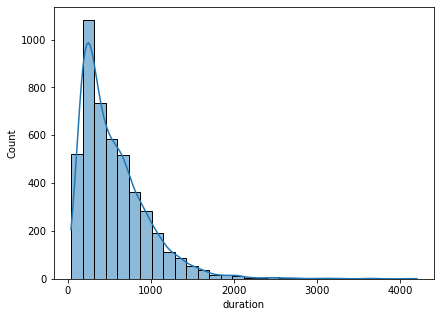

In [381]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(yes_duration, bins=30, kde=True)


In [382]:
print(yes_duration.mode()[0])
print(yes_duration.max())
print(yes_duration.mean())

301
4199
553.1911637931034


Client yang memiliki deposito berjangka, saat di telpon lama durasinya kebanyakan berada pada durasi 0 - 1000 detik atau sekitar 15 menit. Dengan durasi terbanyak berada pada nilai 301 detik dan durasi terlama berada pada nilai 4199 detik. Rata-rata durasi telepon client dengan deposito berjangka sebesar 553 detik

In [383]:
no_duration = data[data ['y'] =='no']['duration']
no_duration

0        261
1        149
2        226
3        151
4        307
        ... 
41180    254
41182    112
41184    383
41185    189
41187    239
Name: duration, Length: 36548, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='Count'>

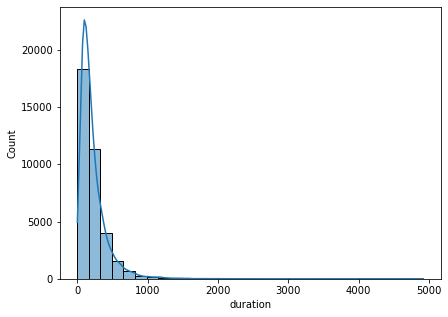

In [384]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(no_duration, bins=30, kde=True)

In [385]:
print(no_duration.mode()[0])
print(no_duration.max())
print(no_duration.mean())

85
4918
220.84480682937507


Client yang tidak memiliki deposito berjangka kebanyakan durasi telepon berada pada nilai 0-200 detik dengan durasi terbanyak sebesar 85 detik dan durasi maximum 4918 detik. Rata-rata durasi client yang tidak emmiliki deposito berjangka berada pada nilai 220 detik.

### Campaign

Text(0.5, 1.0, 'Histogram of Camapaign')

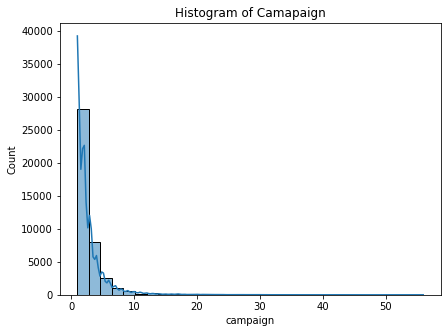

In [386]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['campaign'], bins=30, kde=True)
plt.title('Histogram of Camapaign')

In [387]:
print(data['campaign'].mean())
print(data['campaign'].mode()[0])

2.567592502670681
1


Rata-rata campaign yang dilakukan ke client sebsar 2.5 dan paling banyak dilakukan satu kali saja

### Pdays

Text(0.5, 1.0, 'Histogram of pdays')

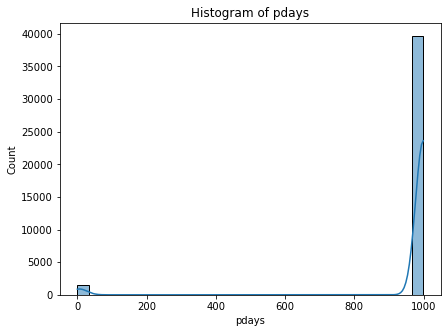

In [388]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['pdays'], bins=30, kde=True)
plt.title('Histogram of pdays')

pdays atau jumlah hari yang terlewati setelah dihubungi pada campaign sebelumnya paling banyak berada pada 3-6 hari setelah dihubungi.

### Previous

In [389]:
previous = data['previous'].value_counts()

<AxesSubplot:ylabel='previous'>

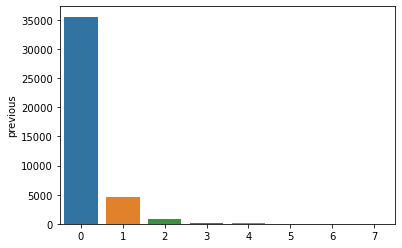

In [390]:
sns.barplot( x=previous.index, y=previous, orient='v') 

Jumlah kontak yang dilakukan sebelum kampanye paling banyak di angka 0

### Poutcome

In [391]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

Hasil dari campaign lebih banyak gagalnya daripada berhasilnya

In [392]:
yes_poutcome = data[data ['y'] =='yes']['poutcome'].value_counts()
yes_poutcome

nonexistent    3141
success         894
failure         605
Name: poutcome, dtype: int64

<AxesSubplot:xlabel='poutcome'>

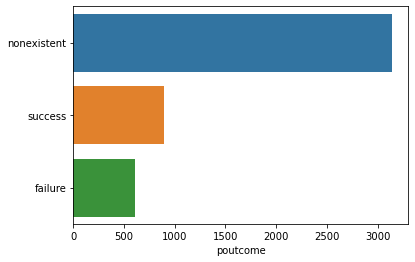

In [393]:
sns.barplot( x=yes_poutcome, y=yes_poutcome.index, orient='h') 

In [394]:
no_poutcome = data[data ['y'] =='no']['poutcome'].value_counts()
no_poutcome

nonexistent    32422
failure         3647
success          479
Name: poutcome, dtype: int64

<AxesSubplot:xlabel='poutcome'>

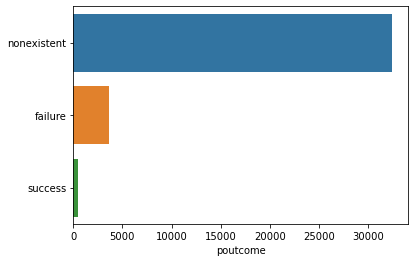

In [395]:
sns.barplot( x=no_poutcome, y=no_poutcome.index, orient='h') 

Ternyata client yang memiliki deposito berjangka hasil dari campaign sebelumnya kebanyakan berhasil dan client yang tidak memiliki deposito berjangka pada campaign sebelumnya kebanyakan mengalami kegagalan

### emp.var.rate

Text(0.5, 1.0, 'Histogram of emp.var.rate')

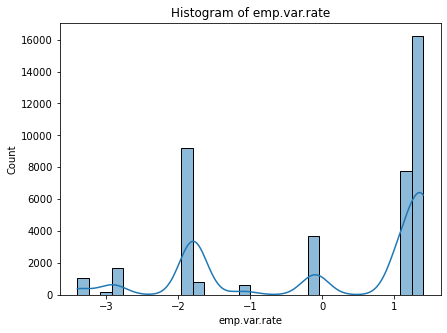

In [396]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['emp.var.rate'], bins=30, kde=True)
plt.title('Histogram of emp.var.rate')

Dari garfik histogram tersebut diketahui jika emp.var.rate atau nilai variansi employer paling banyak di angka 1

### Cons.price.idx

Text(0.5, 1.0, 'Histogram of cons.price.idx')

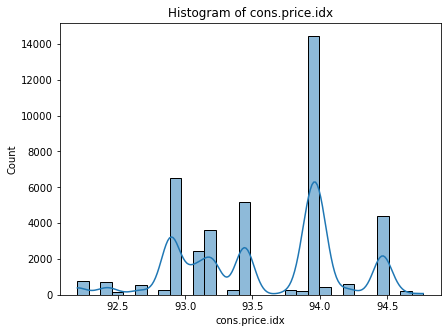

In [397]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['cons.price.idx'], bins=30, kde=True)
plt.title('Histogram of cons.price.idx')

Indeks Harga Kansumen paling tinggi berada pada angka 94

### Consumer Confidence Index

Text(0.5, 1.0, 'Histogram of cons.conf.idx')

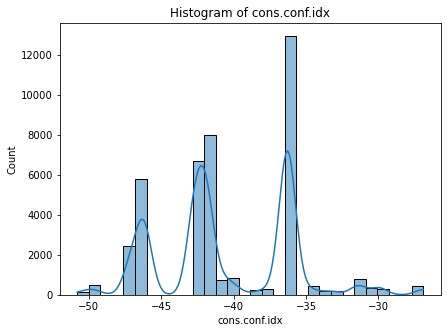

In [398]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['cons.conf.idx'], bins=30, kde=True)
plt.title('Histogram of cons.conf.idx')

Indeks kepercayaan konsumen paling banyak berada pada angka sekitar -37

### Euribor3m

Text(0.5, 1.0, 'Histogram of euribor3m')

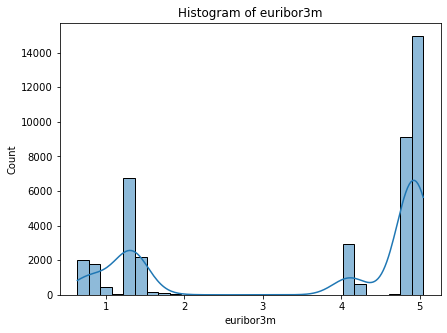

In [399]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['euribor3m'], bins=30, kde=True)
plt.title('Histogram of euribor3m')

Nilai euribor 3 bulan paling banyak di angka 5

### Number Employes

Text(0.5, 1.0, 'nr.employed')

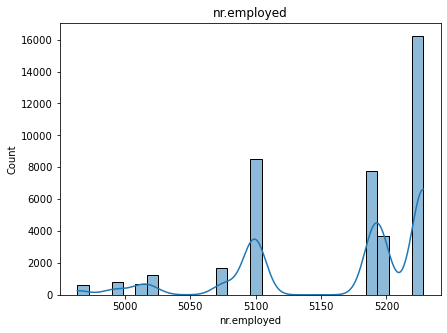

In [400]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['nr.employed'], bins=30, kde=True)
plt.title('nr.employed')

Jumlah karyawan dari client tersebut paling banyak berada pada angka sekitar 5500 orang

# 5. Data Preprocessing

Mengubah data unknown menjadi missing values

In [401]:
data[data=='unknown']=np.nan

In [402]:
data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Setelah diubah data unknown menjadi bentu missing values, banyak feature yang sebelumnya tidak memiliki missing values, kini memilikinya seperti job, marital, education, deafult, housing, dan loan. Feature default memiliki missing values yang paling banyak.

Mengubah data 999 pada pdays ke NAN

In [403]:
data.replace({'pdays':{999 :np.NaN}}, inplace=True)

In [404]:
data.isnull().sum()

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             39673
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

Ternyata setelah 999 diubah ke missing value, terdapat 39673 missing values pada features pdays.

Karena data pekerjaan sangat banyak, maka akan saya bagi menjadi beberapa kategori seperti white-collar, blue-collar, not working, dan unknown

In [405]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', nan,
       'entrepreneur', 'student'], dtype=object)

In [406]:
data['job'] = data['job'].replace(['services', 'admin.','self-employed','entrepreneur','management'], 'White-collar')\
                                    .replace(['blue-collar', 'technician', 'housemaid'], 'Blue-collar')\
                                        .replace(['retired','unemployed','student'],'Not-working')

In [407]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,Blue-collar,married,basic.4y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,White-collar,married,high.school,NaN,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,White-collar,married,high.school,no,yes,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,White-collar,married,basic.6y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,White-collar,married,high.school,no,no,yes,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [408]:
data['job'].unique()

array(['Blue-collar', 'White-collar', 'Not-working', nan], dtype=object)

- Pekerjaan services, admin, management, self-emplyed, entrepreneur dimasukkan ke kategori White-collar
- Pekerjaan blue-collar, techinician dan housemaid dimasukkan ke keategori blue-collar
- Pekerjaan retired, unemployed, dan student dimasukkan ke kategori Not-working

Saya juga akan mengubah data education ke beberapa tingkatan

In [409]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

In [410]:
data['education'] = data['education'].map({'illiterate':0,
                               'basic.4y': 1,
                               'basic.6y': 1,
                               'basic.9y':1,
                               'high.school':2,
                               'professional.course':3,
                               'university.degree':4})

In [411]:
data['education'].unique()

array([ 1.,  2.,  3., nan,  4.,  0.])

data education sudah diubah bentuknya enjadi sebuah tingkatan. Untuk yang illeterate atau tidak dapat membaca diberikan angka 0. Untuk yang basic diberikan angka 1. Untuk high school diberikan angka 2. Untuk profession Course diberikan angak 3 dan dengan gelar Universitas diberikan angka 4

In [412]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,Blue-collar,married,1.0,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,White-collar,married,2.0,NaN,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,White-collar,married,2.0,no,yes,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,White-collar,married,1.0,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,White-collar,married,2.0,no,no,yes,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [413]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  float64
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           1515 non-null   float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Kolom education sudah memiliki tipe data float

### Pembuatan Data Inference

In [414]:
data_inf = data.sample(10, random_state=79)
data_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37974,30,White-collar,married,4.0,no,yes,no,telephone,sep,mon,...,1,NaN,1,failure,-3.4,92.379,-29.8,0.797,5017.5,no
18114,35,White-collar,married,2.0,no,no,no,cellular,jul,wed,...,1,NaN,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
12249,53,Blue-collar,divorced,3.0,no,no,no,telephone,jul,thu,...,4,NaN,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1001,34,Blue-collar,married,2.0,no,no,no,telephone,may,wed,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
35293,34,Blue-collar,married,3.0,no,yes,yes,cellular,may,fri,...,3,NaN,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
19798,30,White-collar,single,4.0,no,yes,no,cellular,aug,fri,...,1,NaN,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
7624,47,Blue-collar,married,1.0,no,no,no,telephone,may,fri,...,5,NaN,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
29928,33,Blue-collar,married,1.0,NaN,no,yes,cellular,apr,mon,...,2,NaN,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
12386,33,White-collar,married,1.0,no,yes,no,cellular,jul,mon,...,2,NaN,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
33678,23,Not-working,single,2.0,no,yes,no,cellular,may,wed,...,1,NaN,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no


In [415]:
data = data.drop(data_inf.index)
data 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,Blue-collar,married,1.0,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,White-collar,married,2.0,NaN,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,White-collar,married,2.0,no,yes,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,White-collar,married,1.0,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,White-collar,married,2.0,no,no,yes,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,Not-working,married,3.0,no,yes,no,cellular,nov,fri,...,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,Blue-collar,married,3.0,no,no,no,cellular,nov,fri,...,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,Not-working,married,4.0,no,yes,no,cellular,nov,fri,...,2,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,Blue-collar,married,3.0,no,no,no,cellular,nov,fri,...,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Data inference digunakan sebagai data baru yang nantinya akan diprediksi hasilnya oleh model, maka dari itu data inference di drop dari dataset.

In [416]:
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

Data Infernce dan Dataset di reset indexnya agar menjadi lebih rapi

### Split between X (features) and y (target)

In [417]:
from sklearn.model_selection import train_test_split

X = data.drop(['y'], axis=1)
y = data['y']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=79)

X dan y dilakukan splitting dengan ukuran test sebesar 20%.

In [418]:
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (32942, 20)
Test Size  :  (8236, 20)


Ukuran test 20% menghasilkan Train Set sebanyak 32942 baris dan Test set 8236 baris

In [419]:
y_train.shape

(32942,)

Ukuran y_train sama seperti X_train sebesar 32942 baris

### Handling Outlier

In [420]:
def diagnostic_plots(X_train, column):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[column], bins=30)
    plt.title(f'Distribution of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[column])
    plt.title(f'Boxplot of {column}')



    plt.show()
    skewness = X_train[column].skew(axis=0, skipna = True)
    print(f'Skewness of {column}=',skewness)

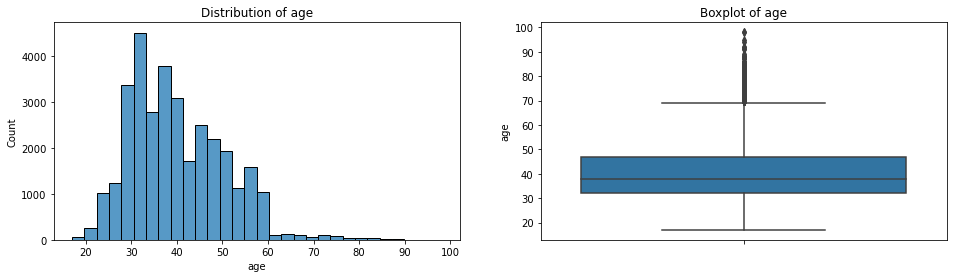

Skewness of age= 0.7917442247074418


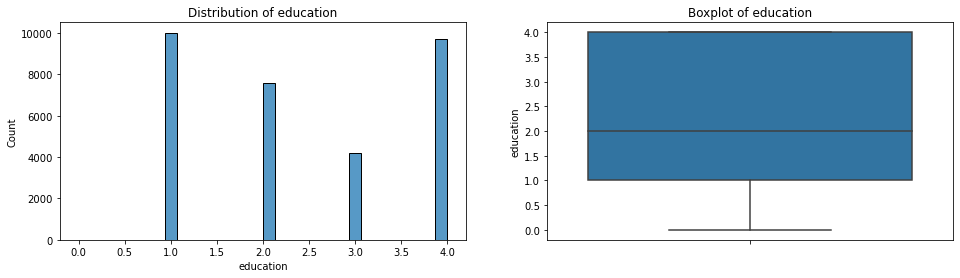

Skewness of education= 0.14131787468773555


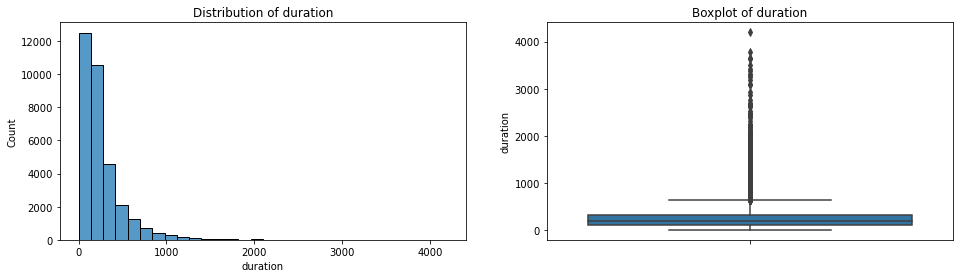

Skewness of duration= 3.272236523227767


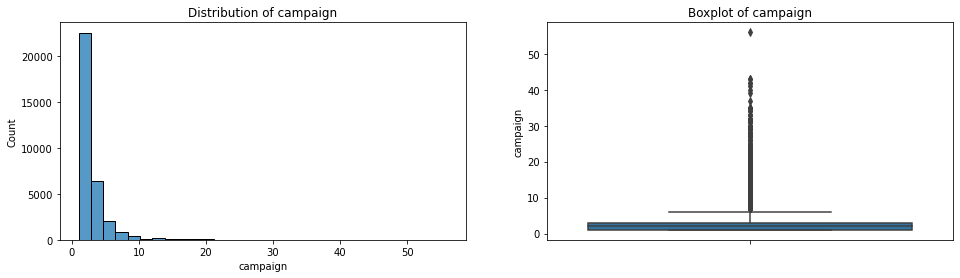

Skewness of campaign= 4.826622610527237


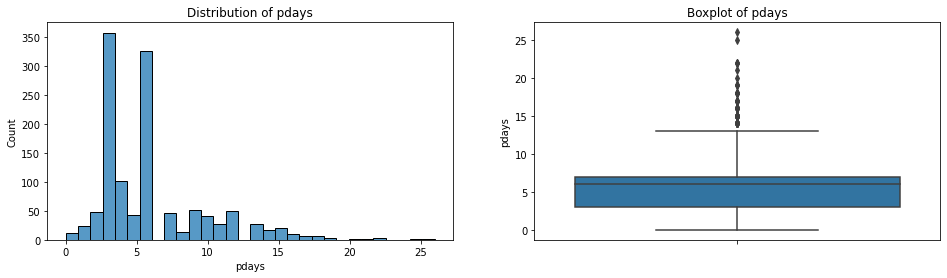

Skewness of pdays= 1.4130031950215711


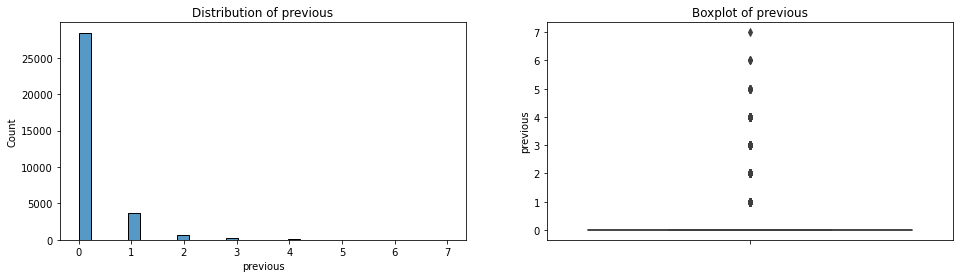

Skewness of previous= 3.811822026316485


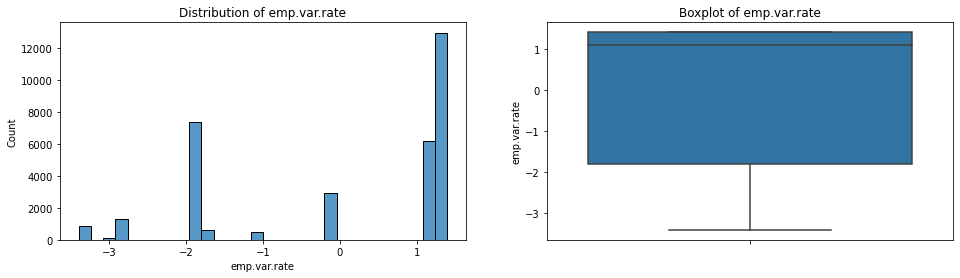

Skewness of emp.var.rate= -0.7205469849671227


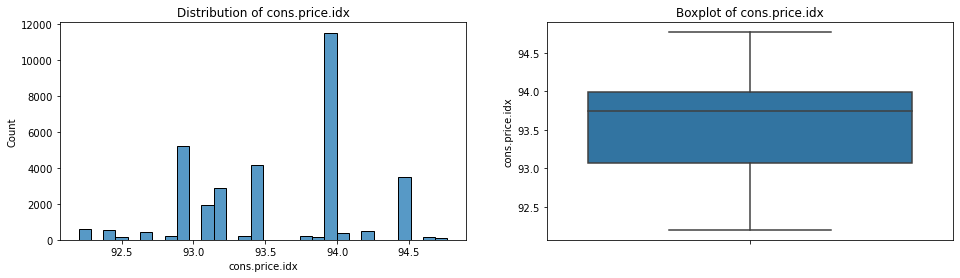

Skewness of cons.price.idx= -0.22744687349734868


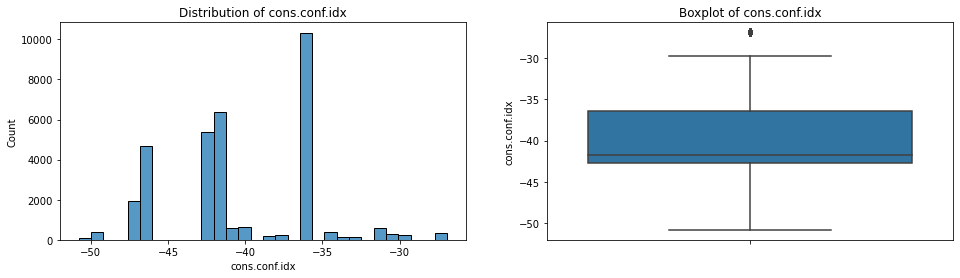

Skewness of cons.conf.idx= 0.3002732621153835


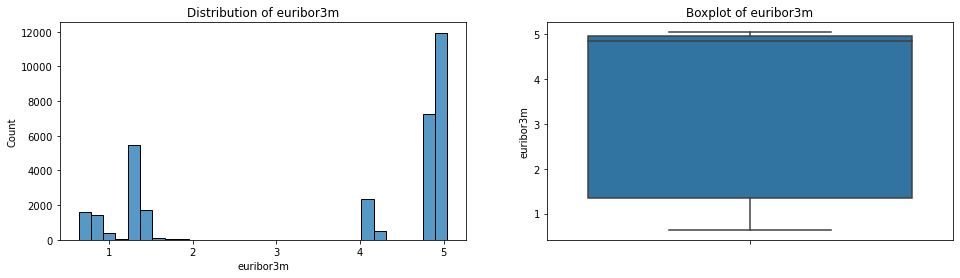

Skewness of euribor3m= -0.7057799410866362


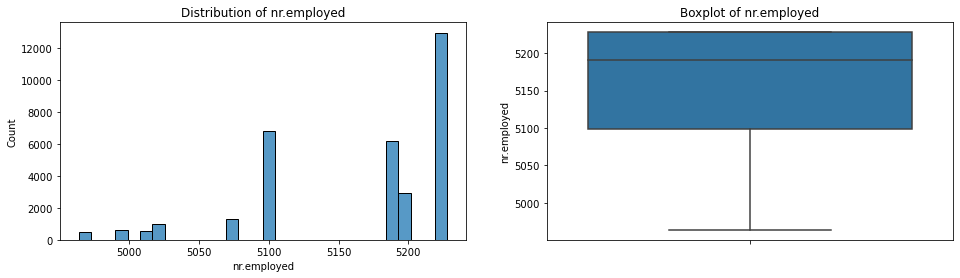

Skewness of nr.employed= -1.0417367693943858


In [421]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
for column in num_columns:
     diagnostic_plots(X_train, column)

Feature berdistribusi Normal: cons.price.idx, cons.conf.idx, dan education

Feature berdistribusi Skew: age, duration, campaign, pdays, previous, emp.var.rate, dan ne.employed

In [422]:
def check_outliers(data, column):
    skewness = data[column].skew(axis=0, skipna=True)
    if skewness <= 0.5 and skewness >=-0.5:
       
        upper_boundary = data[column].mean() + 3 * data[column].std()
        lower_boundary = data[column].mean() - 3 * data[column].std()
        print(['Normal'])
        print(f'Upper Boundary of {column}:', upper_boundary)
        print(f'Lower Boundary of {column}:', lower_boundary)
        jumlah_outlier_upper = format(len(data[data[column] > upper_boundary]))
        print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
        jumlah_outlier_lower  = format(len(data[data[column]<lower_boundary]))
        print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
        persentase_outlier_upper = format(len(data[data[column] > upper_boundary])  / len(data)*100)
        print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
        persentase_outlier_lower = format(len(data[data[column] < lower_boundary])  / len(data)*100)
        print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
        print('-'*100)
    else:
         IQR = X_train[column].quantile(0.75) - X_train[column].quantile(0.25)
         lower_boundary = X_train[column].quantile(0.25) - (IQR * 1.5)
         upper_boundary = X_train[column].quantile(0.75) + (IQR * 1.5)
         print(['Skewed'])
         print(f'Upper Boundary of {column}:', upper_boundary)
         print(f'Lower Boundary of {column}:', lower_boundary)
         jumlah_outlier_upper = format(len(data[data[column] > upper_boundary]))
         print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
         jumlah_outlier_lower  = format(len(data[data[column]<lower_boundary]))
         print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
         persentase_outlier_upper = format(len(data[data[column] > upper_boundary])  / len(data)*100)
         print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
         persentase_outlier_lower = format(len(data[data[column] < lower_boundary])  / len(data)*100)
         print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
         print('-'*100)

In [423]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
for column in num_columns:
     check_outliers(X_train, column)

['Skewed']
Upper Boundary of age: 69.5
Lower Boundary of age: 9.5
Total Data Above Upper Boundary age: 371
Total Data Below Lower Boundary age: 0
% Data Above Upper Boundary age: 1.1262218444538885
% Data Below Lower Boundary age: 0.0
----------------------------------------------------------------------------------------------------
['Normal']
Upper Boundary of education: 6.104973121880638
Lower Boundary of education: -1.2428352280455655
Total Data Above Upper Boundary education: 0
Total Data Below Lower Boundary education: 0
% Data Above Upper Boundary education: 0.0
% Data Below Lower Boundary education: 0.0
----------------------------------------------------------------------------------------------------
['Skewed']
Upper Boundary of duration: 642.0
Lower Boundary of duration: -222.0
Total Data Above Upper Boundary duration: 2388
Total Data Below Lower Boundary duration: 0
% Data Above Upper Boundary duration: 7.249104486673548
% Data Below Lower Boundary duration: 0.0
-----------

Dari informasi tersebut maka akan dilakukan Handling Outlier dengan cara:

Trimming: age dan pdays karena persentase outlier dibawah 5%

Capping: campaign dan duration karena persentase outlier antara 5% - 10%.

Ignoring: feature lainnya karena persentase yang tinggi. Kolom previous memiliki outlier sebesar 13%. Saya memilih untuk membiarkan saja karena akan banyak informasi yang diubah

In [424]:
print('X_train - Before Handling :', X_train.shape)
outlier_trimmer1 = OutlierTrimmer( capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['age', 'pdays'],
                   missing_values='ignore'
                   )

outlier_trimmer1.fit(X_train)

X_train = outlier_trimmer1.transform(X_train)
print('X_train - After Handling : ', X_train.shape)

X_train - Before Handling : (32942, 20)
X_train - After Handling :  (32505, 20)


Setelah di trimming, X_train memiliki 32507 baris yang sebelumnya 32590 baris atau berkurang sekitar 1.3% dari X_train awal

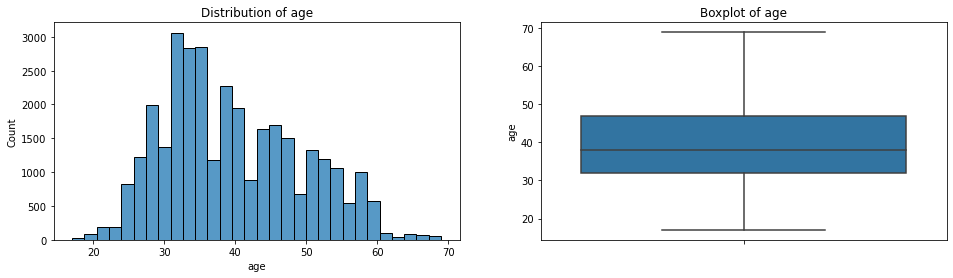

Skewness of age= 0.4433331627423263


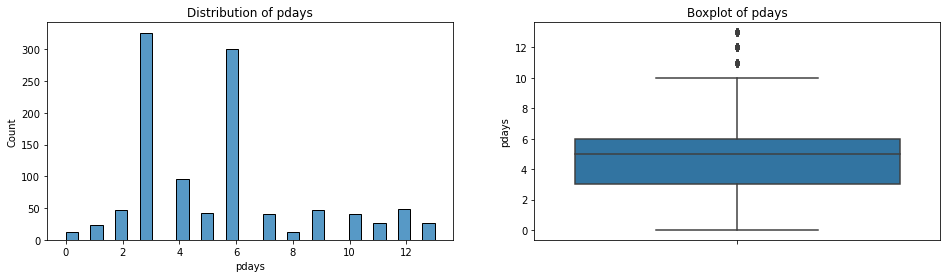

Skewness of pdays= 0.8747784704810998


In [425]:
trim_columns = ['age','pdays']
for column in trim_columns:
     diagnostic_plots(X_train, column)

Hasilnya distribusi feature age menjadi normal, tetapi distribusi pdays masih skew dan masih ada outlier

In [426]:
print('X_train - Before Handling :', X_train.shape)
winsorizer = Winsorizer( capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['campaign', 'duration'],
                   missing_values='ignore'
                   )

winsorizer.fit(X_train)

X_train = winsorizer.transform(X_train)
print('X_train - After Handling : ', X_train.shape)

X_train - Before Handling : (32505, 20)
X_train - After Handling :  (32505, 20)


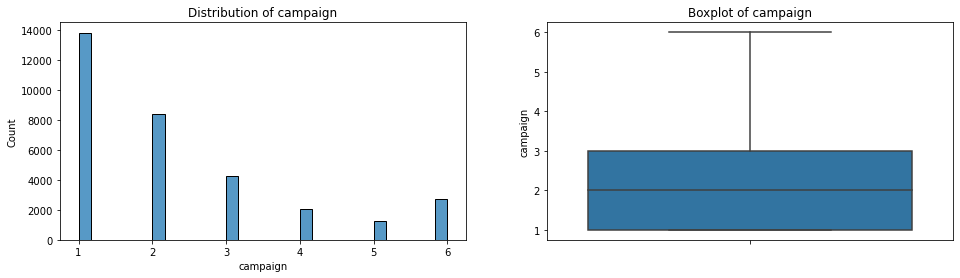

Skewness of campaign= 1.2066179046183139


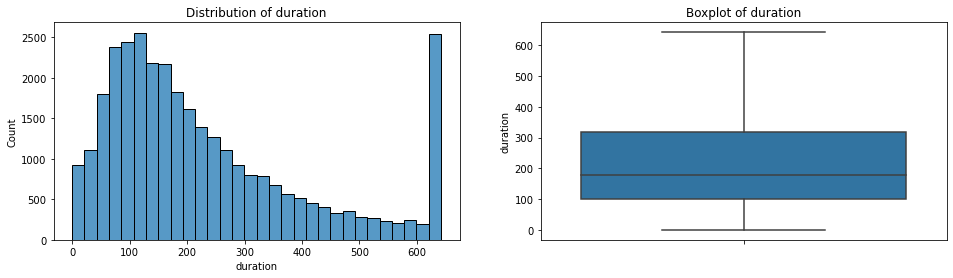

Skewness of duration= 1.0439254308062575


In [427]:
capping_columns = ['campaign','duration']
for column in capping_columns:
     diagnostic_plots(X_train, column)

Hasilnya pada feature campaign, distribusinya masih skew dan outlier kemungkinan banyak diubah ke nilai 6. Sementara itu untuk feature duration, distribusinya masih skew dan terlihat jelas outlier diubah ke nilai duration pada sekitar 650.

In [428]:
y_train = y_train[X_train.index]
y_train.shape

(32505,)

### Handling Missing Values

In [429]:
X_train.isnull().sum()

age                   0
job                 274
marital              68
education          1379
default            6826
housing             789
loan                789
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             31417
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
dtype: int64

In [430]:
X_train['pdays'].skew()

0.8747784704810998

In [431]:
X_train['pdays'].fillna(X_train['pdays'].median(), inplace=True)

Karena feature pdays skew, maka feature tersebut diisi oleh nilai median.

In [432]:
X_train.isnull().sum()

age                  0
job                274
marital             68
education         1379
default           6826
housing            789
loan               789
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

Untuk kolom kategori akan diisi menggunakan modusnya

In [433]:
def impute_na_mode(data, column):
    mode_value = X_train[column].mode()[0]

    fillna_mode = data[column].fillna(mode_value, inplace=True)

    return fillna_mode

In [434]:
impute_mode_feature = ['job', 'marital', 'education', 'default','housing','loan']

In [435]:
for column in impute_mode_feature:
     impute_na_mode(X_train, column)

In [436]:
X_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [437]:
X_test.isnull().sum()

age                  0
job                 52
marital             11
education          306
default           1738
housing            194
loan               194
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays             7958
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

In [438]:
X_test['pdays'].fillna(X_train['pdays'].median(), inplace=True)

C:\Users\Muhamad Afif\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [439]:
X_test.isnull().sum()

age                  0
job                 52
marital             11
education          306
default           1738
housing            194
loan               194
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

Tidak ada missing value lagi pada X_train

Handling missing value pada X_test akan dilakukan sama seperti X_train dengan nilai mean, median, dan modus yang sama dengan X_train

In [440]:
X_test.isnull().sum()

age                  0
job                 52
marital             11
education          306
default           1738
housing            194
loan               194
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

In [441]:
X_test['pdays'].fillna(X_train['pdays'].median(), inplace=True)

In [442]:
X_test.isnull().sum()

age                  0
job                 52
marital             11
education          306
default           1738
housing            194
loan               194
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

In [443]:
impute_mode_feature = ['job', 'marital', 'education', 'default','housing','loan']

In [444]:
for column in impute_mode_feature:
     impute_na_mode(X_test,column)

In [445]:
X_test.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

Tidak ada missing values pada X_test

Missing values di data inference juga dilakukan sama dengan di X_train

In [446]:
data_inf.isnull().sum()

age                0
job                0
marital            0
education          0
default            1
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays             10
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
y                  0
dtype: int64

In [447]:
data_inf['pdays'].fillna(X_train['pdays'].median(), inplace=True)

In [448]:
data_inf.isnull().sum()

age               0
job               0
marital           0
education         0
default           1
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [449]:
impute_mode_feature = ['job', 'marital', 'education', 'default','housing','loan']

In [450]:
for column in impute_mode_feature:
     impute_na_mode(data_inf,column)

In [451]:
data_inf.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Tidak ada lagi missing values pada data inference

In [452]:
print(y_train.isnull().sum())
print(y_test.isnull().sum())

0
0


Tidak ada juga missing values pada y_train dan y_test

### Feature Selection

In [453]:
X_train_heatmap = X_train[['duration', 'age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

<AxesSubplot:>

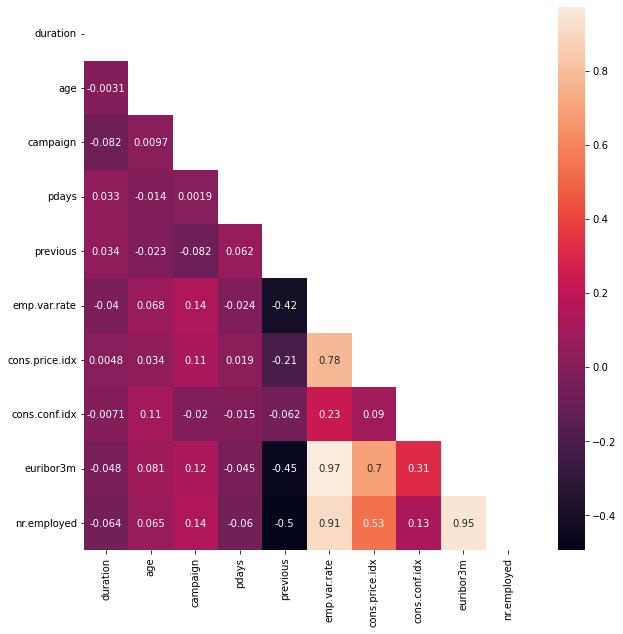

In [454]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train_heatmap.corr(),annot=True, mask=np.triu(X_train_heatmap.corr()))

Feature yang memiliki korelasi positif terhadap duration adalah pdays, previous, dan cons.price.idx, sehingga feature-feature tersebut yang akan digunakan untuk model. Untuk feature pdays di drop karena feature tersebut 96% datanya missing value, sehingga datanya kebanyakan merupakan nilai median, sehingga datanya tidak asli lagi. Kemudian untuk duration dari perintah datasetnya, lebih baik di drop agar dihasilkan prediksi yang lebih realistis. Feature cons.conf.index dipertahankan karena dari pengertiannya yaitu tingkat kepercayaan konsumen terhadap suatu produk perbankan, feature ini berpengaruh terhadap nasabah agar mau memiliki deposito berjangka.

In [455]:
X_train.drop([ 'age', 'campaign','emp.var.rate' ,'euribor3m', 'nr.employed','pdays','duration'], axis=1, inplace=True)
X_test.drop([ 'age', 'campaign','emp.var.rate','euribor3m', 'nr.employed','pdays','duration'] ,axis=1, inplace=True)
X_train.head()

C:\Users\Muhamad Afif\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,cons.price.idx,cons.conf.idx
31687,White-collar,married,1.0,no,no,no,cellular,may,thu,0,nonexistent,92.893,-46.2
4017,White-collar,married,2.0,no,yes,yes,telephone,may,mon,0,nonexistent,93.994,-36.4
38529,Not-working,married,2.0,no,no,no,cellular,oct,wed,1,success,92.431,-26.9
18312,White-collar,married,4.0,no,no,no,cellular,jul,wed,0,nonexistent,93.918,-42.7
27602,White-collar,married,2.0,no,no,no,cellular,nov,fri,1,failure,93.200,-42.0


Feature month dan day_of_week setelah dilakukan EDA, feature ini tidak memiliki keterkaitan dengan target. Sementara feature default sangat banyak data unknownnya atau missing values dan data yes nya hanya ada 3, sehingga lebih baik di drop saja. Dan dari hasil EDA feature housing juga tidak terlalu berpengaruh signifikan pada seseorang memiliki deposito berjangka ataupun tidak.

In [456]:
X_train.drop(['month', 'day_of_week','default','housing'], axis=1, inplace=True)
X_test.drop([ 'month', 'day_of_week','default','housing'] ,axis=1, inplace=True)
X_train.head()

C:\Users\Muhamad Afif\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,job,marital,education,loan,contact,previous,poutcome,cons.price.idx,cons.conf.idx
31687,White-collar,married,1.0,no,cellular,0,nonexistent,92.893,-46.2
4017,White-collar,married,2.0,yes,telephone,0,nonexistent,93.994,-36.4
38529,Not-working,married,2.0,no,cellular,1,success,92.431,-26.9
18312,White-collar,married,4.0,no,cellular,0,nonexistent,93.918,-42.7
27602,White-collar,married,2.0,no,cellular,1,failure,93.200,-42.0


### Split between numerical and categorical columns

In [457]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['education', 'previous', 'cons.price.idx', 'cons.conf.idx']
Categorical Columns :  ['job', 'marital', 'loan', 'contact', 'poutcome']


Kolom numerikal terdiri dari education, previous, consumer confidence index, dan consumer price index. Sementara kolom kategorikal terdiri dari job, marital, loan, contact, dan poutcome.

In [458]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train dan X_test dibagi menjadi kolom numerikal dan kategorikal.

### Feature Scaling

In [459]:
X_train_num.head()

,education,previous,cons.price.idx,cons.conf.idx
31687,1.0,0,92.893,-46.2
4017,2.0,0,93.994,-36.4
38529,2.0,1,92.431,-26.9
18312,4.0,0,93.918,-42.7
27602,2.0,1,93.200,-42.0


Scaler yang digunakan adalah PoweTransformer karena semua datanya diubah menjadi distribusi normal

In [460]:
scaler = PowerTransformer()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[-1.19814464, -0.3886742 , -1.18539902, -1.2824688 ],
       [-0.14228696, -0.3886742 ,  0.70162214,  0.93408421],
       [-0.14228696,  2.57216091, -1.86488298,  2.60073086],
       ...,
       [ 1.23118045, -0.3886742 ,  0.70162214,  0.93408421],
       [-1.19814464, -0.3886742 ,  0.55810577, -0.43301968],
       [-0.14228696,  2.57216091, -1.93760056,  2.14243396]])

### Feature Encoding

In [461]:
X_train_cat

,job,marital,loan,contact,poutcome
31687,White-collar,married,no,cellular,nonexistent
4017,White-collar,married,yes,telephone,nonexistent
38529,Not-working,married,no,cellular,success
18312,White-collar,married,no,cellular,nonexistent
27602,White-collar,married,no,cellular,failure
...,...,...,...,...,...
22232,Blue-collar,married,no,cellular,nonexistent
18580,White-collar,single,yes,cellular,nonexistent
4931,White-collar,married,no,telephone,nonexistent
17482,Not-working,married,no,cellular,nonexistent


One Hot Encoder dipilih karena semua datanya adalah berupa kategorikal nominal

In [462]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat).toarray()
X_test_cat_enc = encoder.transform(X_test_cat).toarray()
X_train_cat_enc

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

### Concat between Numerical Columns and Categorical Columns

Kolom numerikal dan kategorikal digabung membentuk X_train_final dan X_test_final

In [463]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)
X_train_final

array([[-1.19814464, -0.3886742 , -1.18539902, ...,  0.        ,
         1.        ,  0.        ],
       [-0.14228696, -0.3886742 ,  0.70162214, ...,  0.        ,
         1.        ,  0.        ],
       [-0.14228696,  2.57216091, -1.86488298, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.23118045, -0.3886742 ,  0.70162214, ...,  0.        ,
         1.        ,  0.        ],
       [-1.19814464, -0.3886742 ,  0.55810577, ...,  0.        ,
         1.        ,  0.        ],
       [-0.14228696,  2.57216091, -1.93760056, ...,  0.        ,
         0.        ,  1.        ]])

# 6. Model Definition


Semua model didefinisikan

### Logistic Regression

In [464]:
log_reg = LogisticRegression()

### Support Vactor Machine

In [465]:
clf= SVC()

### K-Nearest Neigbors

In [466]:
neigh = KNeighborsClassifier()

### Naive Bayes

In [467]:
nb = GaussianNB()

### Decision Tree Classifier 

In [468]:
tree_clf = DecisionTreeClassifier()

### Random Forest Classifier 

In [469]:
rf = RandomForestClassifier()

### Stochastic Gradient Descent

In [470]:
sgd = SGDClassifier()

# 7. Model Training

### Logistic Regression

Semua model ditraining dengan nama yang berbeda-beda

In [471]:
log_reg.fit(X_train_final, y_train)

LogisticRegression()

### Support Vector Machine

In [472]:
clf.fit(X_train_final,y_train)

SVC()

### K-Nearest Neighbors

In [473]:
neigh.fit(X_train_final,y_train)

KNeighborsClassifier()

### Naive Bayes

In [474]:
nb.fit(X_train_final,y_train)

GaussianNB()

### Decision Tree Classifier 

In [475]:
tree_clf.fit(X_train_final,y_train)

DecisionTreeClassifier()

### Random Forest Classifier 

In [476]:
rf.fit(X_train_final,y_train)

RandomForestClassifier()

### Stochastic Gradient Descent

In [477]:
sgd.fit(X_train_final,y_train)

SGDClassifier()

# 8. Model Evaluation

## Baseline

### Logistic Regression

In [478]:
y_pred_train_logistic = log_reg.predict(X_train_final)


In [479]:
print(accuracy_score(y_train, y_pred_train_logistic))


0.9008460236886633


In [480]:
print(classification_report(y_train, y_pred_train_logistic))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95     29028
         yes       0.64      0.17      0.26      3477

    accuracy                           0.90     32505
   macro avg       0.77      0.58      0.61     32505
weighted avg       0.88      0.90      0.87     32505



Didapatkan akurasi X_train pada model Logistic Regeression sebesar 90%. Tetapi karena data no dan yes tidak seimbang dimana jumlah data no 9 kali lipat data yes, maka digunakan nilai weighted avg f1-score. Didapatkan nilai weighted avg f1-score pada model logistic regeression sebesar 87%.

### Support Vector Machine

In [481]:
y_pred_train_svm = clf.predict(X_train_final)


In [482]:
print(accuracy_score(y_train, y_pred_train_svm))


0.9038609444700815


In [483]:
print(classification_report(y_train, y_pred_train_svm))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95     29028
         yes       0.72      0.17      0.27      3477

    accuracy                           0.90     32505
   macro avg       0.81      0.58      0.61     32505
weighted avg       0.89      0.90      0.88     32505



Didapatkan akurasi X_train pada model Support Vector Machine sebesar 90%. Tetapi karena data no dan yes tidak seimbang dimana jumlah data no 9 kali lipat data yes, maka digunakan nilai weighted Avg f1-score. Didapatkan nilai weighted avg f1-score pada model Support Vector Machine sebesar 88%.

### K-Nearest Neighbors

In [484]:
y_pred_train_knn = neigh.predict(X_train_final)


In [485]:
print(accuracy_score(y_train, y_pred_train_knn))


0.9105060759883095


In [486]:
print(classification_report(y_train, y_pred_train_knn))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     29028
         yes       0.67      0.32      0.43      3477

    accuracy                           0.91     32505
   macro avg       0.80      0.65      0.69     32505
weighted avg       0.90      0.91      0.90     32505



Didapatkan akurasi X_train pada model K-Nearest Neighbors sebesar 91%. Tetapi karena data no dan yes tidak seimbang dimana jumlah data no 9 kali lipat data yes, maka digunakan nilai weighted Avg f1-score. Didapatkan nilai weighted avg f1-score pada model K-Nearest Neigbors sebesar 90%.

### Naive Bayes

In [487]:
y_pred_train_nb = nb.predict(X_train_final)


In [488]:
print(accuracy_score(y_train, y_pred_train_nb))


0.8260882941085986


In [489]:
print(classification_report(y_train, y_pred_train_nb))

              precision    recall  f1-score   support

          no       0.92      0.88      0.90     29028
         yes       0.27      0.36      0.31      3477

    accuracy                           0.83     32505
   macro avg       0.59      0.62      0.60     32505
weighted avg       0.85      0.83      0.84     32505



Didapatkan akurasi X_train pada model Naive Bayes sebesar 82%. Tetapi karena data no dan yes tidak seimbang dimana jumlah data no 9 kali lipat data yes, maka digunakan nilai weighted Avg f1-score. Didapatkan nilai weighted avg f1-score pada model Naive Bayes sebesar 84%.

### Decision Tree Classifier 

In [490]:
y_pred_train_tree = tree_clf.predict(X_train_final)


In [491]:
print(accuracy_score(y_train, y_pred_train_tree))


0.926134440855253


In [492]:
print(classification_report(y_train, y_pred_train_tree))

              precision    recall  f1-score   support

          no       0.93      0.99      0.96     29028
         yes       0.87      0.36      0.51      3477

    accuracy                           0.93     32505
   macro avg       0.90      0.68      0.74     32505
weighted avg       0.92      0.93      0.91     32505



Didapatkan akurasi X_train pada model Decision Tree Classifier  sebesar 92%. Tetapi karena data no dan yes tidak seimbang dimana jumlah data no 9 kali lipat data yes, maka digunakan nilai weighted Avg f1-score. Didapatkan nilai weighted avg f1-score pada model Decision Tree Classifier  sebesar 91%.

### Random Forest Classifier 

In [493]:
y_pred_train_rf = rf.predict(X_train_final)


In [494]:
print(accuracy_score(y_train, y_pred_train_rf))


0.926134440855253


In [495]:
print(classification_report(y_train, y_pred_train_rf))

              precision    recall  f1-score   support

          no       0.93      0.99      0.96     29028
         yes       0.82      0.40      0.53      3477

    accuracy                           0.93     32505
   macro avg       0.88      0.69      0.75     32505
weighted avg       0.92      0.93      0.91     32505



Didapatkan akurasi X_train pada model Random Forest Classifier  sebesar 92%. Tetapi karena data no dan yes tidak seimbang dimana jumlah data no 9 kali lipat data yes, maka digunakan nilai weighted Avg f1-score. Didapatkan nilai weighted avg f1-score pada model Random Forest Classifier  sebesar 91%.

### Stochastic Gradient Descent

In [496]:
y_pred_train_sgd = sgd.predict(X_train_final)


In [497]:
print(accuracy_score(y_train, y_pred_train_sgd))


0.9017074296262113


In [498]:
print(classification_report(y_train, y_pred_train_sgd))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95     29028
         yes       0.64      0.18      0.29      3477

    accuracy                           0.90     32505
   macro avg       0.78      0.59      0.62     32505
weighted avg       0.88      0.90      0.88     32505



Didapatkan akurasi X_train pada model Stochastic Gradient Descent sebesar 90%. Tetapi karena data no dan yes tidak seimbang dimana jumlah data no 9 kali lipat data yes, maka digunakan nilai weighted Avg f1-score. Didapatkan nilai weighted avg f1-score pada model Stochastic Gradient Descent sebesar 88%.

In [499]:
# Memerikasa f1 score pos label yes model Decision Tree Classifier 
print(f1_score(y_train, y_pred_train_tree, pos_label='yes'))

0.5118926611099817


In [500]:
# Memerikasa f1 score pos label yes model Random Forest Classifier 
print(f1_score(y_train, y_pred_train_rf, pos_label='yes'))

0.5345997286295794


Karena nilai weighted avg f1 score untuk model Decision Tree Classifier dan Random Forest Classifier  sama, maka dilihat f1-score dari label yes. Hasilnya nilai f1 score untuk model Random Forest Classifier  lebih tinggi dibandingkan model Decision Tree Classifier . Artinya model Random Forest Classifier  dapat memprediksi kategori yes lebih banyak dibandingkan model Decision Tree.

Maka dari itu, untuk baseline model Random Forest Classifier  adalah model yang terbaik dari nilai f1-scorenya. Tetapi nilai tersebut masih belum valid, maka dari itu perlu dilakukan Cross Validation untuk membuktikannya.

## Cross Validation

### Logistic Regression

In [501]:
f1_train_cross_val= cross_val_score(log_reg, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring="f1_weighted")

print('F1-Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1-Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1-Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1-Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1-Score - All - Cross Validation  :  [0.8727086  0.87373    0.87447744]
F1-Score - Mean - Cross Validation :  0.8736386813451248
F1-Score - Std - Cross Validation  :  0.0007250081131561136
F1-Score - Range of Test-Set       :  0.8729136732319687 - 0.8743636894582809


Pada Cross Validation model Logistic Regression didapatkan nilai rata-rata weighted avg f1-score sebesar 87.36% dengan standar devisasi 0,07%. Maka rentang nilai f1-scorenya berkisar 87,29% - 87.43%

### Support Vector Machine

In [502]:
f1_train_cross_val = cross_val_score(clf, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring='f1_weighted',
                                      
                                      )

print('F1-Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1-Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1-Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1-Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1-Score - All - Cross Validation  :  [0.87462588 0.87484607 0.8757134 ]
F1-Score - Mean - Cross Validation :  0.8750617847113039
F1-Score - Std - Cross Validation  :  0.00046944785817045327
F1-Score - Range of Test-Set       :  0.8745923368531334 - 0.8755312325694744


Pada Cross Validation model Support Vector Machine didapatkan nilai rata-rata weighted avg f1-score sebesar 87.5% dengan standar devisasi 0,04%. Maka rentang nilai f1-scorenya berkisar 87.45% - 87.55%

### K-Nearest Neighbors

In [503]:
f1_train_cross_val = cross_val_score(neigh, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring='f1_weighted',
                                      
                                      )

print('F1-Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1-Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1-Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1-Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1-Score - All - Cross Validation  :  [0.87750441 0.87845593 0.88193474]
F1-Score - Mean - Cross Validation :  0.8792983581816619
F1-Score - Std - Cross Validation  :  0.0019042443825344087
F1-Score - Range of Test-Set       :  0.8773941137991275 - 0.8812026025641964


Pada Cross Validation model K-Nearest Neighbors didapatkan nilai rata-rata weighted avg f1-score sebesar 87.02% dengan standar devisasi 0,19%. Maka rentang nilai f1-scorenya berkisar 87.73% - 88.12%

### Naive Bayes

In [504]:
f1_train_cross_val = cross_val_score(nb, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring='f1_weighted',
                                      
                                      )

print('F1-Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1-Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1-Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1-Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1-Score - All - Cross Validation  :  [0.83192128 0.83840176 0.83852656]
F1-Score - Mean - Cross Validation :  0.8362832025371466
F1-Score - Std - Cross Validation  :  0.0030847641464915912
F1-Score - Range of Test-Set       :  0.833198438390655 - 0.8393679666836382


Pada Cross Validation model Naive Bayes didapatkan nilai rata-rata weighted avg f1-score sebesar 83.62% dengan standar devisasi 0,3%. Maka rentang nilai f1-scorenya berkisar 83.31% - 8393%

### Decision Tree

In [505]:
f1_train_cross_val = cross_val_score(tree_clf, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring='f1_weighted',
                                      
                                      )

print('F1-Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1-Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1-Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1-Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1-Score - All - Cross Validation  :  [0.87715017 0.87416669 0.87552689]
F1-Score - Mean - Cross Validation :  0.8756145851199011
F1-Score - Std - Cross Validation  :  0.0012195769114998218
F1-Score - Range of Test-Set       :  0.8743950082084012 - 0.876834162031401


Pada Cross Validation model Decision Tree Classifier didapatkan nilai rata-rata weighted avg f1-score sebesar 87,56% dengan standar devisasi 0,12%. Maka rentang nilai f1-scorenya berkisar 87,43% - 87.68%.

### Random Forest

In [506]:
f1_train_cross_val = cross_val_score(rf, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring='f1_weighted',
                                      
                                      )

print('F1-Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1-Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1-Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1-Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1-Score - All - Cross Validation  :  [0.87836311 0.88069103 0.88128661]
F1-Score - Mean - Cross Validation :  0.8801135832076336
F1-Score - Std - Cross Validation  :  0.001261427135825305
F1-Score - Range of Test-Set       :  0.8788521560718082 - 0.8813750103434589


Pada Cross Validation model Random Forest Classifier didapatkan nilai rata-rata weighted avg f1-score sebesar 88% dengan standar devisasi 0,12%. Maka rentang nilai f1-scorenya berkisar 87.88% - 88.13%.

### Stochastic Gradient Descent

In [507]:
f1_train_cross_val = cross_val_score(sgd, 
                                      X_train_final, 
                                      y_train, 
                                      cv=3, scoring='f1_weighted',
                                      
                                      )

print('F1-Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1-Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1-Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1-Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1-Score - All - Cross Validation  :  [0.87499154 0.87643804 0.87825022]
F1-Score - Mean - Cross Validation :  0.8765599325210266
F1-Score - Std - Cross Validation  :  0.0013331389317262072
F1-Score - Range of Test-Set       :  0.8752267935893004 - 0.8778930714527527


Pada Cross Validation model Stochastic Gradient Descent didapatkan nilai rata-rata weighted avg f1-score sebesar 87.65% dengan standar devisasi 0,13%. Maka rentang nilai f1-scorenya berkisar 87.52% - 87.78%.

Model Random Forest Classifier memiliki nilai f1-score yang sama dan paling tinggi diantara model lainnya. Maka dari itu model Support Vector Machine terplih untuk memprediksi X_test dan dilakukan Hyperparameter Tunning.

### Predict X_test using Support Vector Machine

In [508]:
y_pred_test = rf.predict(X_test_final)

In [509]:
print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')


Accuracy - Test Set   :  0.8890237979601748 

Classification Report : 
               precision    recall  f1-score   support

          no       0.91      0.97      0.94      7292
         yes       0.54      0.24      0.33       944

    accuracy                           0.89      8236
   macro avg       0.72      0.61      0.64      8236
weighted avg       0.87      0.89      0.87      8236
 



Untuk nilai akurasi X_train_final dan X_test_final, X_train_final memiliki akurasi pada nilai 92% dan X_test_final memiliki akurasi 88%. Artinya model ini sedikit overfit

Didapatkan nilai weighted avg f1-score yaitu 88% pada prediski X_test final. Nilai tersebut berada rentang cross validation yaitu pada rentang 87.88% - 88.13%.

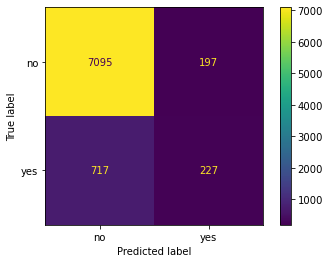

In [510]:
plot_confusion_matrix(rf, X_test_final, y_test) 
plt.show()

Masih banyak data kategori yes yang diprediksi sebagai kategori no

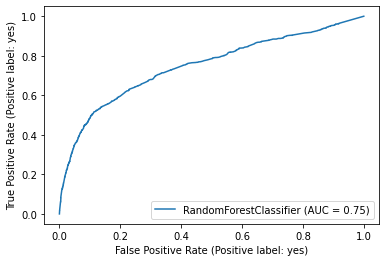

In [511]:
plot_roc_curve(rf, X_test_final, y_test )

Nilai AUC sebesar 0.75. Artinya model tersebut masih dapat memprediksi lebih banyak true positive dan true negative dibandingkan false positive dan false negative

## Hyperparameter Tunning

## Random Search

Dilakukan Hyperparameter Tunning untuk mencari parameter terbaik menggunakan grid search. Grid search digunakan karena grid search akan mencari parameter terbaik dari semua pilihan-pilihan parameter yang telah diberikan.

Untuk model Random Forest Classifier, parameter-parameter yang diberikan yaitu:
- n_estimators diberikan pilihan mulai dari 200 hingga 2000 sebanyak 10 nilai.
- max_features diberikan pilihan auto,sqrt, dan log2. 
- max_depth dengan pilihan nilai mulai dari 10 hingga 1000 sebanyak 10 nilai.
- min_sample_split diberikan pilihan nilai 2,5,10,dan 14.
- min_sample_leaf diberikan pilihan nilai 1,2,4,6 dan 8
- criterion diberikan pilihan entropy dan gini

Default Gradient Boosting Classifier:

- n_estimators: 100
- max_features: auto
- max_depth: None
- min_sample_split: 2
- min_sample_leaf: 1
- criterion: gini

Sebelum dilakukan Grid Search, agar waktunya lebih singkat, dilakukan random search terlebih dahulu. Bebrapa hasil dari Random Search akan digunakan lagi pada Grid Search, dan beberapa parameter akan ditambahkan nilainya

In [512]:


n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'criterion': ['entropy', 'gini']}

In [513]:
rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(), 
                                 param_distributions=random_grid,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1)
rf_randomcv.fit(X_train_final, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=46)

In [514]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 780,
 'criterion': 'gini'}

Hasil Hyperparameter Tuning dari Random Search
- n_estimators: 200
- max_features: auto
- max_depth: 780
- min_sample_split: 10
- min_sample_leaf: 8
- criterion: gini

In [519]:
rf_randomcv_best = RandomForestClassifier(n_estimators=200,min_samples_split=10,min_samples_leaf=8,max_features='auto',max_depth=780,criterion='gini')

In [521]:
rf_randomcv_best.fit(X_train_final,y_train)

RandomForestClassifier(max_depth=780, min_samples_leaf=8, min_samples_split=10,
                       n_estimators=200)

In [533]:
y_pred_train_random = rf_randomcv_best.predict(X_train_final)
print('Accuracy - Test Set   : ', accuracy_score(y_train, y_pred_train_random), '\n')

Accuracy - Test Set   :  0.9088140286109829 



In [522]:
y_pred_test_random = rf_randomcv_best.predict(X_test_final)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test_random), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_random), '\n')



Accuracy - Test Set   :  0.8950947061680428 

Classification Report : 
               precision    recall  f1-score   support

          no       0.90      0.99      0.94      7292
         yes       0.64      0.19      0.30       944

    accuracy                           0.90      8236
   macro avg       0.77      0.59      0.62      8236
weighted avg       0.87      0.90      0.87      8236
 



Pada perhitungan akurasi gyperparameter tuning menggunakan Random Search didapatkan nilai akurasi X_train sebesar 90% dan nilai akurasi X_test 89.5%. Nilai tersebut hanya selisih sekitar 0.5% yang artinya model ini merupakan model yang good-fit.

Hasil Random Search didapatkan nilai akurasi naik dari 88% menjadi 89,5%. Sementara itu nilai f1-score sama seperti defaultnya.

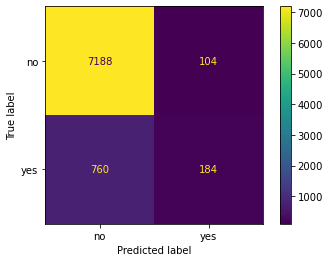

In [523]:
plot_confusion_matrix(rf_randomcv_best, X_test_final, y_test) 
plt.show()

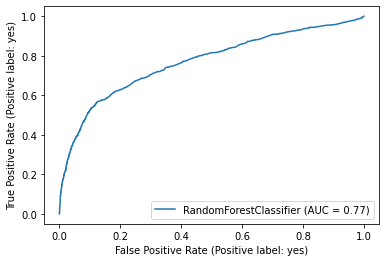

In [524]:
plot_roc_curve(rf_randomcv_best, X_test_final, y_test )

Nilai AUC juga naik yang sebelumnya 0.75 menjadi 0.77 dengan Random Search.

### Grid Search

Grid search dilakukan dari hasil tunning Random Search, tetapi parameter min_samples_leaf, min_samples_split, n_estimators ditambahkan beberapa nilai.

In [541]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf']-2,
                        rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2], 
                       
    'min_samples_split': [
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1
    ],
    'n_estimators': [ 
                     rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, 
    ]
}

param_grid

{'criterion': ['gini'],
 'max_depth': [780],
 'max_features': ['auto'],
 'min_samples_leaf': [6, 8, 10],
 'min_samples_split': [9, 10, 11],
 'n_estimators': [100, 200, 300]}

In [542]:
rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=param_grid,
                         cv=5,
                         n_jobs=-1,
                         verbose=2)

rf_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [780],
                         'max_features': ['auto'],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [9, 10, 11],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [543]:
rf_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 780,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 9,
 'n_estimators': 300}

Hasil Hyperparameter Tuning dari Grid Search
- n_estimators: 300
- max_features: auto
- max_depth: 780
- min_sample_split: 10
- min_sample_leaf: 9
- criterion: gini

In [544]:
rf_gridcv_best = rf_gridcv.best_estimator_

In [545]:
y_pred_train_grid = rf_gridcv_best.predict(X_train_final)
print('Accuracy - Test Set   : ', accuracy_score(y_train, y_pred_train_grid), '\n')

Accuracy - Test Set   :  0.9077372711890478 



In [546]:
y_pred_test_grid = rf_gridcv_best.predict(X_test_final)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test_grid), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_grid), '\n')

Accuracy - Test Set   :  0.8953375424963574 

Classification Report : 
               precision    recall  f1-score   support

          no       0.90      0.99      0.94      7292
         yes       0.64      0.19      0.30       944

    accuracy                           0.90      8236
   macro avg       0.77      0.59      0.62      8236
weighted avg       0.87      0.90      0.87      8236
 



Nilai akurasi X_train_final sebesar 90% dan X_test_final 89.5%. Kedua nilai tersebut saling berdekatan yang artinya model hasi Grid Search merupakan model yang good-fit.

Nilai akurasi naik dari grid search menjadi 89,9% mendekati 90%, tetapi sama seperti hasil parameter terbaik dari Randmo Search.

Nilai f1-score 87% sama seperti defaultnya 

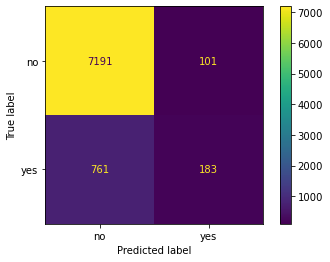

In [547]:
plot_confusion_matrix(rf_gridcv_best, X_test_final, y_test) 
plt.show()

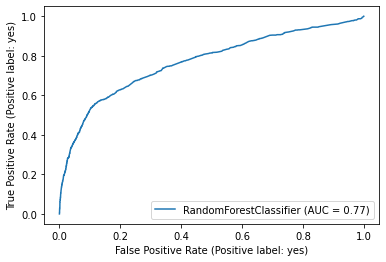

In [548]:
plot_roc_curve(rf_gridcv_best, X_test_final, y_test )

Nilai AUC sebsar 0.77 meningkat dari default dan sama seperti Randmo Search.

Dapat disimpulkan beberapa evaluasi pada Random Search dan grid Search seperti akurasi meningkan beserta AUCnya. Keduanya juga memiliki model yang good-fit berbesa dari defaultnya yang sedikit iver-fit. Namun nilai f1-scorenya sama seperti defaultnya.

# 9. Model Inference

In [549]:
data_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,White-collar,married,4.0,no,yes,no,telephone,sep,mon,...,1,5.0,1,failure,-3.4,92.379,-29.8,0.797,5017.5,no
1,35,White-collar,married,2.0,no,no,no,cellular,jul,wed,...,1,5.0,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
2,53,Blue-collar,divorced,3.0,no,no,no,telephone,jul,thu,...,4,5.0,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
3,34,Blue-collar,married,2.0,no,no,no,telephone,may,wed,...,1,5.0,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
4,34,Blue-collar,married,3.0,no,yes,yes,cellular,may,fri,...,3,5.0,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
5,30,White-collar,single,4.0,no,yes,no,cellular,aug,fri,...,1,5.0,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
6,47,Blue-collar,married,1.0,no,no,no,telephone,may,fri,...,5,5.0,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
7,33,Blue-collar,married,1.0,no,no,yes,cellular,apr,mon,...,2,5.0,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
8,33,White-collar,married,1.0,no,yes,no,cellular,jul,mon,...,2,5.0,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
9,23,Not-working,single,2.0,no,yes,no,cellular,may,wed,...,1,5.0,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no


In [550]:
data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]
data_inf_num

,education,previous,cons.price.idx,cons.conf.idx
0,4.0,1,92.379,-29.8
1,2.0,0,93.918,-42.7
2,3.0,0,93.918,-42.7
3,2.0,0,93.994,-36.4
4,3.0,0,92.893,-46.2
5,4.0,0,93.444,-36.1
6,1.0,0,93.994,-36.4
7,1.0,1,93.075,-47.1
8,1.0,0,93.918,-42.7
9,2.0,0,92.893,-46.2


In [551]:

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_enc = encoder.transform(data_inf_cat).toarray()

In [552]:
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_enc], axis=1)
data_inf_final

array([[ 1.23118045,  2.57216091, -1.93760056,  2.14243396,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ],
       [-0.14228696, -0.3886742 ,  0.55810577, -0.43301968,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [ 0.62518287, -0.3886742 ,  0.55810577, -0.43301968,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ],
       [-0.14228696, -0.3886742 ,  0.70162214,  0.93408421,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        

prediksi dilakukan dengan model Logistic Regression menggunakan parameter terbaik hasil pencarian menggunakan Grid Search.

In [553]:

y_pred_inf = rf_gridcv_best.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['y - Prediction'])


In [554]:
y_pred_inf_df

,y - Prediction
0,no
1,no
2,no
3,no
4,no
5,no
6,no
7,no
8,no
9,no


In [555]:
pd.concat([data_inf, y_pred_inf_df], axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y - Prediction
0,30,White-collar,married,4.0,no,yes,no,telephone,sep,mon,...,5.0,1,failure,-3.4,92.379,-29.8,0.797,5017.5,no,no
1,35,White-collar,married,2.0,no,no,no,cellular,jul,wed,...,5.0,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes,no
2,53,Blue-collar,divorced,3.0,no,no,no,telephone,jul,thu,...,5.0,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no,no
3,34,Blue-collar,married,2.0,no,no,no,telephone,may,wed,...,5.0,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no,no
4,34,Blue-collar,married,3.0,no,yes,yes,cellular,may,fri,...,5.0,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no,no
5,30,White-collar,single,4.0,no,yes,no,cellular,aug,fri,...,5.0,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,no
6,47,Blue-collar,married,1.0,no,no,no,telephone,may,fri,...,5.0,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no,no
7,33,Blue-collar,married,1.0,no,no,yes,cellular,apr,mon,...,5.0,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no,no
8,33,White-collar,married,1.0,no,yes,no,cellular,jul,mon,...,5.0,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,no
9,23,Not-working,single,2.0,no,yes,no,cellular,may,wed,...,5.0,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no,no


Hasil prediksi dari model didapatkan bahwa dari 10 data inference yang diberikan, model dapat memprediksi 9 data dengan benar (90%).

# 10. Pengambilan Keputusan

## Model Analysis

Pemodelan dilakukan untuk memprediksi client merupakan nasabah dengan deposito berjang atau tidak menggunakan model Rando Forest Classification Dipilihnya model ini karena hasul cross validation nilai weighted average f1-score. Model tersebut digunakan untuk memprediksi X_test dan didapatkan nilai akurasi sebesar 88%, sementara itu nilai akurasi X_train didapatkan nilai 91% yang artinya model Random Forest Classifier secara default ini sedikit over-fit. Dilihat juga nilai f1-score dan didapatkan nilai 87% dan AUC sebesar 0.75. 

 Hyperparameter Tuning dilakukan dengan cara Random dan Grid. Tujuannya dilakukan Random Search terlebih dahulu agar saat dilakukan Grid Search tidak membutuhkan waktu yang sangat lama karena beberapa parameter terbaik diambil dari Random Search, lalu saat masuk ke Grid Search, beberapa parameter ditambahkan pilihan nilai yang akan dipilih untuk menjadi parameter terbaiknya. Berikut adalah parameter terbaik hasil Random Search:

Hasil Hyperparameter Tuning dari Random Search

- n_estimators: 200
- max_features: auto
- max_depth: 780
- min_sample_split: 10
- min_sample_leaf: 8
- criterion: gini

Akurasi dari hyperparameter tuning Random Search didapatkan nilai 89.5% untuk X_test dan 90% yang artinya model tersebut sudah merupakan model yang good-fit dan akurasinya meningkat dari defaultnya. Nilai f1-score sebesar 87% yang artinya sama seperti defaultnya dan AUC sebesar 0.77 meningkat dari defaultnya yaitu 0.75. Kemudian dilakukan Grid Search dengan meambahkan beberapa pilihan nilai dari parameter min_sample_split, min_sample_leaf, dan n_estimators. Hasilnya sebagai berikut:

- n_estimators: 300
- max_features: auto
- max_depth: 780
- min_sample_split: 10
- min_sample_leaf: 9
- criterion: gini

Hasilnya nilai akurasi X_test meningkat dari default yaitu 89.5% dan nilai akurasi X_train sebesar 90%. Nilai kedua akurasi tersebut saling berdekatan yang artinya setelah dilakukan Grid Search model tersebut merupakan model yang good-fit. Namun nilai f1-score sama dengan default yaitu 87% dan sama seperti dari hasil Random Search. Kemudian nilai AUC meningkat dari default dan sama seperti hasil Random Search yaitu 0.77. Nilai F1-score default dapat lebih baik dari hasil Hyperparameter Tuning dengan Random maupun Grid Search mungkin dikarenakan default sudah baik memprediksi kategori yes dan no secara benar, atau nialif1-score memang sudah mentok di angka 87%.

Model hasil hyperparameter tuning menggunakan Grid Search kemudian dijadikan model untuk memprediksi data_inference. Dan hasilnya dari 10 data inference yang diberika, model dapat memprediksi 90% dengan tepat.



## Overall Analysis

- Dilakukan pemodelan untuk memprediksi client merupakan nasabah dengan deposito berjangka atau tidak menggunakan 9 feature yaitu job, marital,education, loan, contact, previous, poutcome, cons.price.idx, dan cons.conf.idx dengan pertimbangan korelasinya dengan feature duration yang menurut dataset erupakan feature yang paling berpengaruh terhadap suatu client memiliki deposito berjangka atau tidak, Beserta analisis dari EDA, personal judgement dan perintah dari dataset.

- Dilakukan pemodelan dengan 7 algoritma pada X_train yaitu Logistic Regression, Support Vector Machine, K-Nearest Neighbors, Naive Bayes, Decision Tree Classifier, Random Forest Classifier, dan Stchastic Gradient Descent. Hasilnya yang terbaik adalah model Random Forest Classification hasil dari penilaian f1-score pada Cross Validation.

- Hyperparameter Tuning dilakukan dengan 2 cara yaitu Random Search dan Grid Search. Dilakukan Random Search terlebih dahulu agar pada proses Grid Search tidak memakan terlalu banyak waktu sehingga beberapa parameter terbaik dari Random Search dapat digunakan lagi ke Grid Search dan beberapa parameter diberikan tambahan pilihan nilai.

- Hasil dari model inference, didapatkan bahwa model hasil Hyperparameter Tuning menggunakan Grid Search dapat memprediksi 9 dari 10 data inference yang artinya model tersebut dapat memprediksi data inference 90% dengan tepat.